## Laptop Price Prediction Using Machice Learning

## Problem Statement

We will make a project for laptop price prediction. if any user wants to buy a laptop then our application should be compartible to provide a tentative price of the laptop according to the user configurations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load DataSet

In [2]:
df = pd.read_csv('laptop_data.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


## Understanding the Dataset

In [3]:
# check the shape of the dataset
df.shape

(1303, 12)

The Dataset contains 1,303 rows and 12 columns

In [4]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
# check for duplicate
df.duplicated().sum()

0

The Dataset does not contain any duplicate

## Data Cleaning

In [6]:
df.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
# drop the unamed column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

Company Column

In [9]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [10]:
df['Company'].dtype

dtype('O')

TypeName

In [11]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [12]:
df['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [13]:
df['Inches'].dtype

dtype('float64')

ScreenResolution

In [14]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [15]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [16]:
# Replace the GB with ''
df['Ram'] = df['Ram'].str.replace('GB','')

In [17]:
df['Ram'].unique()

array(['8', '16', '4', '2', '12', '6', '32', '24', '64'], dtype=object)

In [18]:
# convert the Ram datatype to integer
df['Ram'] = df['Ram'].astype("int32")

In [19]:
df['Ram'].dtype

dtype('int32')

Weight

In [20]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [21]:
# Replace the 'kg' with '
df['Weight'] = df['Weight'].str.replace('kg','')

In [22]:
df['Weight'].unique()

array(['1.37', '1.34', '1.86', '1.83', '2.1', '2.04', '1.3', '1.6', '2.2',
       '0.92', '1.22', '0.98', '2.5', '1.62', '1.91', '2.3', '1.35',
       '1.88', '1.89', '1.65', '2.71', '1.2', '1.44', '2.8', '2', '2.65',
       '2.77', '3.2', '0.69', '1.49', '2.4', '2.13', '2.43', '1.7', '1.4',
       '1.8', '1.9', '3', '1.252', '2.7', '2.02', '1.63', '1.96', '1.21',
       '2.45', '1.25', '1.5', '2.62', '1.38', '1.58', '1.85', '1.23',
       '1.26', '2.16', '2.36', '2.05', '1.32', '1.75', '0.97', '2.9',
       '2.56', '1.48', '1.74', '1.1', '1.56', '2.03', '1.05', '4.4',
       '1.90', '1.29', '2.0', '1.95', '2.06', '1.12', '1.42', '3.49',
       '3.35', '2.23', '4.42', '2.69', '2.37', '4.7', '3.6', '2.08',
       '4.3', '1.68', '1.41', '4.14', '2.18', '2.24', '2.67', '2.14',
       '1.36', '2.25', '2.15', '2.19', '2.54', '3.42', '1.28', '2.33',
       '1.45', '2.79', '1.84', '2.6', '2.26', '3.25', '1.59', '1.13',
       '1.78', '1.10', '1.15', '1.27', '1.43', '2.31', '1.16', '1.64',
   

In [23]:
df['Weight'] = df['Weight'].astype("float32")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## EXPLORATION DATA ANALYSIS (EDA)

Univariate Analysis:Price Distribution

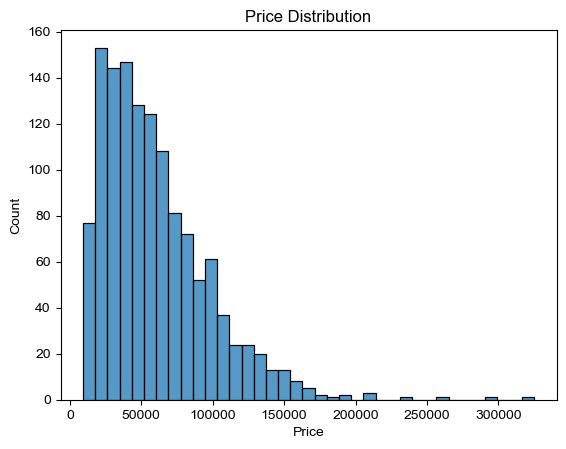

In [25]:
sns.histplot(df['Price'], kde_kws={'color':'purple',
                                    'edgecolor':'black',
                                    'linewidth':0.5,
                                    'linestyle':'--'})
                            
sns.set_style('darkgrid')                                
plt.title("Price Distribution")
plt.show()


Distribution of Inches


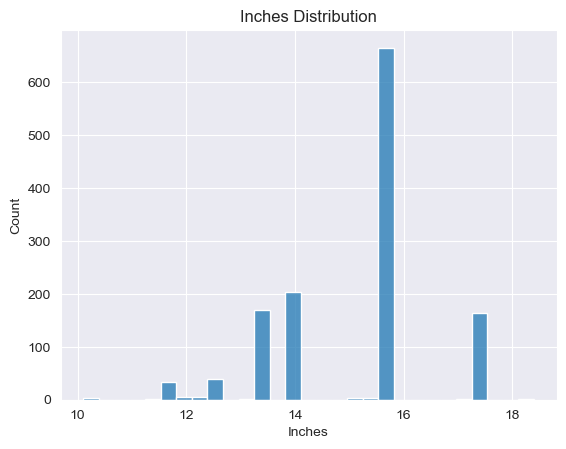

In [26]:
sns.histplot(df['Inches'], kde_kws={'color':'purple',
                                    'edgecolor':'black',
                                    'linewidth':0.5,
                                    'linestyle':'--'})
                            
sns.set_style('darkgrid')                                
plt.title("Inches Distribution")
plt.show()


Distribution of Ram

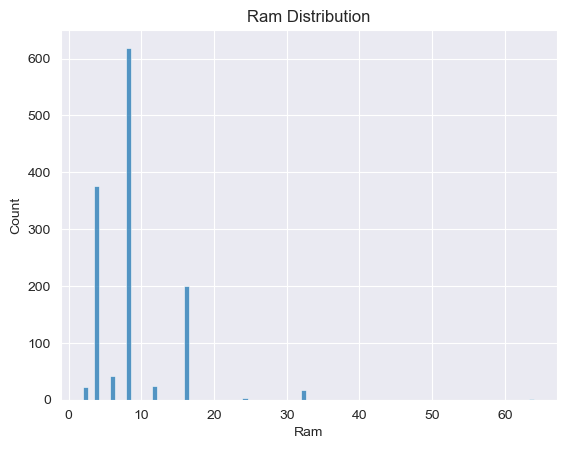

In [27]:
sns.histplot(df['Ram'], kde_kws={'color':'purple',
                                    'edgecolor':'black',
                                    'linewidth':0.5,
                                    'linestyle':'--'})
                            
sns.set_style('darkgrid')                                
plt.title("Ram Distribution")
plt.show()


Bivariate Analysis: 1. Count of Laptop by Company

In [28]:
df.groupby('Company')['TypeName'].count()

Company
Acer         103
Apple         21
Asus         158
Chuwi          3
Dell         297
Fujitsu        3
Google         3
HP           274
Huawei         2
LG             3
Lenovo       297
MSI           54
Mediacom       7
Microsoft      6
Razer          7
Samsung        9
Toshiba       48
Vero           4
Xiaomi         4
Name: TypeName, dtype: int64

In [29]:
count_by_company = df.groupby('Company')['TypeName'].count().reset_index().rename(columns={'TypeName':'count'}).sort_values('count',ascending=False)

In [30]:
count_by_company

,Company,count
4,Dell,297
10,Lenovo,297
7,HP,274
2,Asus,158
0,Acer,103
11,MSI,54
16,Toshiba,48
1,Apple,21
15,Samsung,9
14,Razer,7


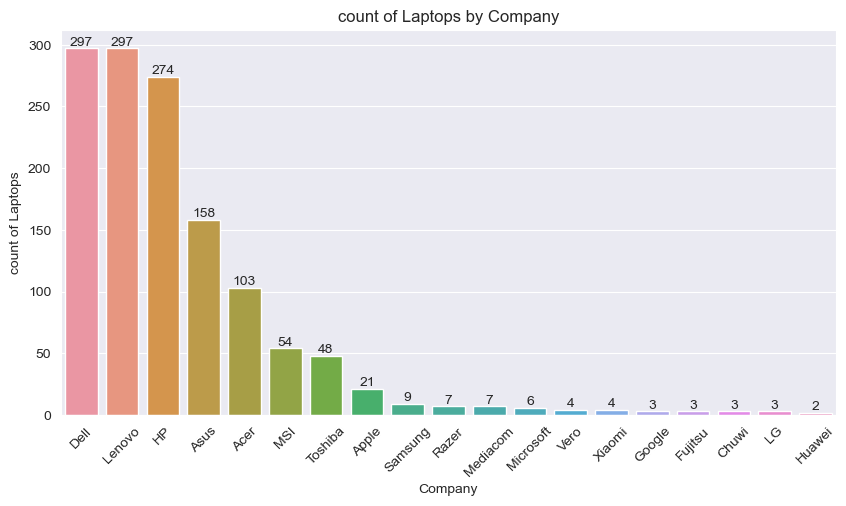

In [31]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=count_by_company, x="Company",y="count")
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("count of Laptops by Company")
plt.xlabel("Company")
plt.ylabel("count of Laptops")
plt.xticks(rotation=45)
plt.show()


2  Average Price of Laptop by Company

In [32]:
Average_Price = df.groupby('Company')['Price'].mean()

In [33]:
price_by_company = df.groupby('Company')['Price'].mean().reset_index().rename(columns={'Price':'Avg_Price'}).sort_values('Avg_Price',ascending=False)

In [34]:
price_by_company

,Company,Avg_Price
14,Razer,178282.491429
9,LG,111834.720000
11,MSI,92116.226133
6,Google,89386.080000
13,Microsoft,85903.788000
1,Apple,83340.499886
8,Huawei,75870.720000
15,Samsung,75308.320000
16,Toshiba,67549.050000
4,Dell,63193.755782


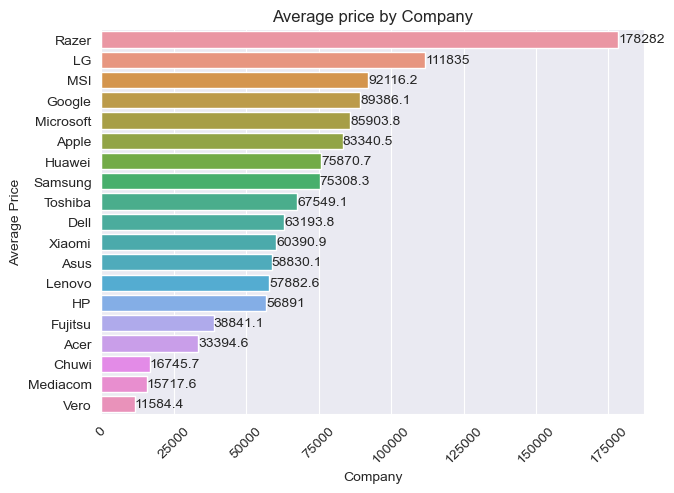

In [35]:
plt.figure(figsize=(7,5))
ax = sns.barplot(data=price_by_company, y="Company",x="Avg_Price")
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Average price by Company")
plt.xlabel("Company")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

3 Count of laptop by Typename

In [36]:
count_by_typename = df.groupby('TypeName')['Company'].count().reset_index().rename(columns={'Company':'count'}).sort_values('count',ascending=False)

In [37]:
count_by_typename

,TypeName,count
3,Notebook,727
1,Gaming,205
4,Ultrabook,196
0,2 in 1 Convertible,121
5,Workstation,29
2,Netbook,25


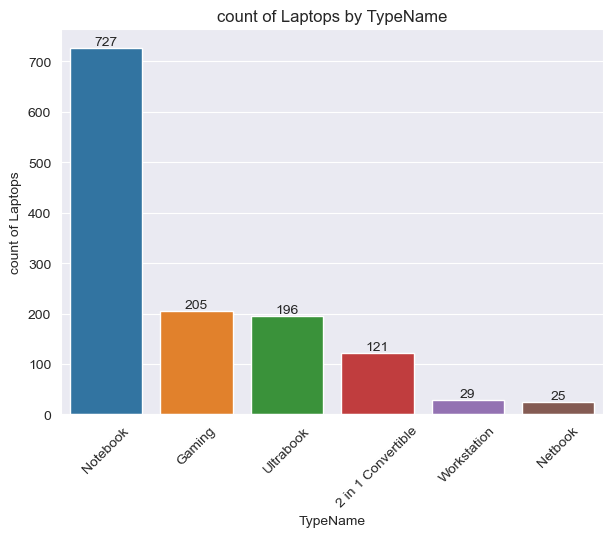

In [38]:
plt.figure(figsize=(7,5))
ax = sns.barplot(data=count_by_typename, x="TypeName",y="count")
ax.bar_label(ax.containers[0], fontsize=10)

plt.title("count of Laptops by TypeName")
plt.xlabel("TypeName")
plt.ylabel("count of Laptops")
plt.xticks(rotation=45)
plt.show()

4. Average price by Typename

In [39]:
price_by_typename = df.groupby('TypeName')['Price'].mean().reset_index().rename(columns={'Price':'Avg Price'}).sort_values('Avg Price',ascending=False)

In [40]:
price_by_typename

,TypeName,Avg Price
5,Workstation,121497.525683
1,Gaming,92247.960187
4,Ultrabook,82489.713429
0,2 in 1 Convertible,68326.360066
3,Notebook,41669.149113
2,Netbook,33898.440960


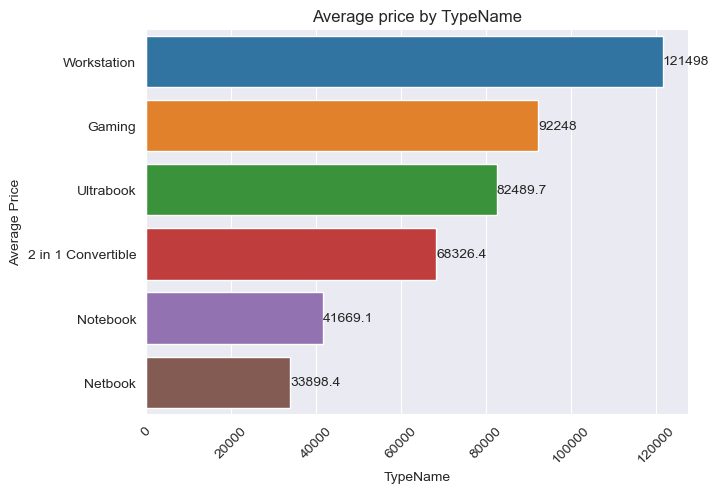

In [41]:
plt.figure(figsize=(7,5))
ax = sns.barplot(data=price_by_typename, y="TypeName", x="Avg Price")
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Average price by TypeName")
plt.xlabel("TypeName")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

5. Relationship of Inches By Price


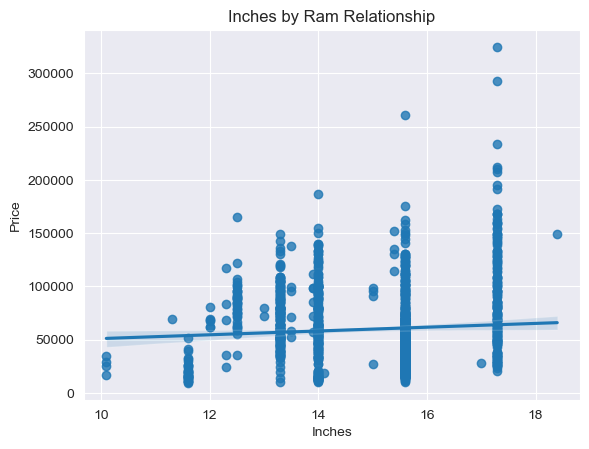

In [42]:
sns.regplot(data=df,x='Inches', y='Price')
                            
sns.set_style('darkgrid')                                
plt.title("Inches by Ram Relationship")
plt.show()

6. Relationship of Ram by Price

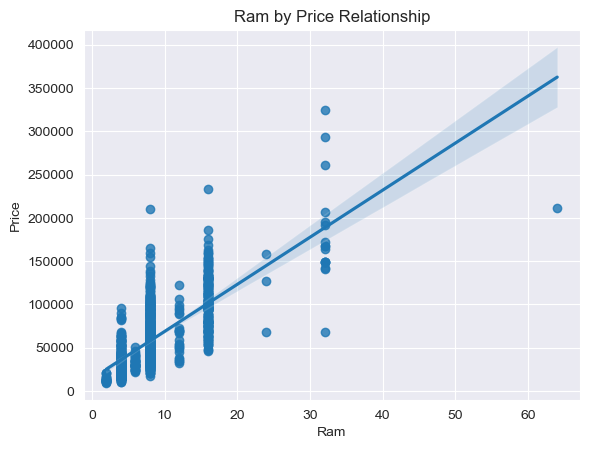

In [43]:
sns.regplot(data=df,x='Ram', y='Price')
                            
sns.set_style('darkgrid')                                
plt.title("Ram by Price Relationship")
plt.show()

7. Relationship Againt Price

In [44]:
df.corr(numeric_only=True)

,Inches,Ram,Weight,Price
Inches,1.000000,0.237993,0.827631,0.068197
Ram,0.237993,1.000000,0.383874,0.743007
Weight,0.827631,0.383874,1.000000,0.210370
Price,0.068197,0.743007,0.210370,1.000000


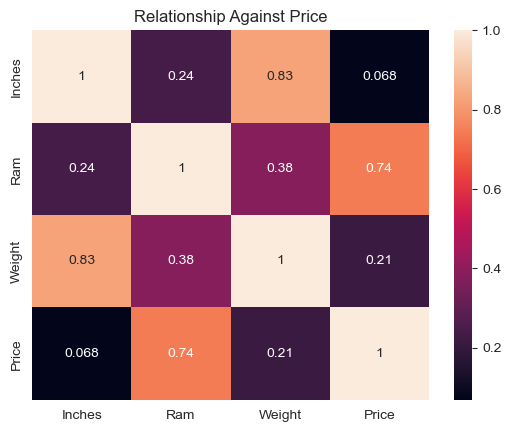

In [45]:
sns.heatmap(data=df.corr(numeric_only=True), annot=True)
                            
sns.set_style('darkgrid')                                
plt.title("Relationship Against Price")
plt.show()

## FEATURE ENGINEERING


In [46]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [47]:
def check_touch(x):
    if 'Touchscreen' in x:
        return 1
    else: 
        return 0

In [48]:
# create a new column to hold whether a laptop is Touch or not

df['ScreenResolution'].apply(check_touch)

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: ScreenResolution, Length: 1303, dtype: int64

In [49]:
df['TouchScreen'] = df['ScreenResolution'].apply(check_touch)

In [50]:
df['TouchScreen']

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: TouchScreen, Length: 1303, dtype: int64

In [51]:
def check_ips(x):
    if 'IPS' in x:
        return 1
    else: 
        return 0

In [52]:
#create a new column to hold whether a laptop is IPS or not

df['IPS'] = df['ScreenResolution'].apply(check_ips)

In [53]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [54]:
df['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [55]:
df['ScreenResolution'].str.split('x')

0               [IPS Panel Retina Display 2560, 1600]
1                                         [1440, 900]
2                                [Full HD 1920, 1080]
3               [IPS Panel Retina Display 2880, 1800]
4               [IPS Panel Retina Display 2560, 1600]
                            ...                      
1298     [IPS Panel Full HD / Touchscreen 1920, 1080]
1299    [IPS Panel Quad HD+ / Touchscreen 3200, 1800]
1300                                      [1366, 768]
1301                                      [1366, 768]
1302                                      [1366, 768]
Name: ScreenResolution, Length: 1303, dtype: object

In [56]:
res_split = df['ScreenResolution'].str.split('x', n=1, expand=True)
res_split

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [57]:
df['X_res'] = res_split[0].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df['Y_res'] = res_split[1]

In [58]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [60]:
df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


 Calculate Pixel Per Inches(PPI)

In [62]:
df['PPI'] = ((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']

In [63]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [64]:
# delete unwanted columns
df.drop(columns={'ScreenResolution', 'X_res','Y_res'}, inplace=True)

In [65]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


CPU

In [66]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [67]:
df['Cpu'].str.split()

0                         [Intel, Core, i5, 2.3GHz]
1                         [Intel, Core, i5, 1.8GHz]
2                  [Intel, Core, i5, 7200U, 2.5GHz]
3                         [Intel, Core, i7, 2.7GHz]
4                         [Intel, Core, i5, 3.1GHz]
                           ...                     
1298               [Intel, Core, i7, 6500U, 2.5GHz]
1299               [Intel, Core, i7, 6500U, 2.5GHz]
1300    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
1301               [Intel, Core, i7, 6500U, 2.5GHz]
1302    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
Name: Cpu, Length: 1303, dtype: object

In [68]:
df['Cpu'].str.split()[0:3]

0           [Intel, Core, i5, 2.3GHz]
1           [Intel, Core, i5, 1.8GHz]
2    [Intel, Core, i5, 7200U, 2.5GHz]
Name: Cpu, dtype: object

In [69]:
 df['CpuName']= df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [70]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CpuName
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [71]:
 df['CpuName'].value_counts()

CpuName
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1


In [72]:
def fetch_processor(text):
    if text == "Intel Core i7" or text == "Intel Core i5" or text == 'Intel Core i3':
        return text
    else:
        if text.split(' ') [0] == 'Intel':
            return "Other Intel Processor"
        else:
            return "Others"
        
    
      

In [73]:
df['CpuBrand'] = df['CpuName'].apply(fetch_processor)

In [74]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CpuName,CpuBrand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   float64
 3   Cpu          1303 non-null   object 
 4   Ram          1303 non-null   int32  
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   float32
 9   Price        1303 non-null   float64
 10  TouchScreen  1303 non-null   int64  
 11  IPS          1303 non-null   int64  
 12  PPI          1303 non-null   float64
 13  CpuName      1303 non-null   object 
 14  CpuBrand     1303 non-null   object 
dtypes: float32(1), float64(3), int32(1), int64(2), object(8)
memory usage: 142.6+ KB


In [76]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [77]:
#Split the memory column based on SSD, HDD, TB, Hybrid and Flash storage

df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')



In [78]:
# split with delimeter (+)  and add 2 new columns n = 1(2 columns 0,1)

new = df["Memory"].str.split("+", n = 1, expand = True)

In [79]:
new

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [80]:
df["first"]= new[0]

# Remove white spaces from the columns

df["first"]=df["first"].str.strip()


In [81]:
df["first"]=df["first"].str.strip()

df["second"]= new[1]


In [82]:
df['second'].value_counts()

second
  1000 HDD       185
  2000 HDD        15
  256 SSD          3
  500 HDD          2
  1000 Hybrid      2
  512 SSD          1
Name: count, dtype: int64

In [83]:
def check_memory_type(x):
    if "SSD" in x:
        print("SSD")
    elif "HDD" in x:
        print("HDD")
    elif "Flash Storage" in x:
        print("Flash Storage")
    else:
        print("Hybrid")

In [84]:
df['first'].apply(check_memory_type)

SSD
Flash Storage
SSD
SSD
SSD
HDD
Flash Storage
Flash Storage
SSD
SSD
HDD
HDD
SSD
SSD
SSD
SSD
SSD
SSD
HDD
SSD
Flash Storage
SSD
HDD
SSD
SSD
HDD
Flash Storage
SSD
SSD
HDD
Flash Storage
Flash Storage
HDD
SSD
Flash Storage
Flash Storage
HDD
SSD
HDD
SSD
HDD
SSD
HDD
SSD
HDD
SSD
SSD
SSD
SSD
HDD
Flash Storage
SSD
SSD
SSD
HDD
SSD
SSD
SSD
SSD
SSD
SSD
SSD
SSD
SSD
SSD
SSD
HDD
SSD
HDD
HDD
SSD
SSD
SSD
SSD
HDD
HDD
HDD
SSD
HDD
SSD
SSD
SSD
SSD
SSD
HDD
SSD
SSD
SSD
SSD
SSD
HDD
HDD
SSD
SSD
SSD
SSD
HDD
SSD
SSD
SSD
SSD
HDD
HDD
SSD
SSD
SSD
HDD
SSD
SSD
SSD
SSD
SSD
SSD
HDD
SSD
SSD
SSD
SSD
HDD
SSD
HDD
SSD
SSD
SSD
SSD
HDD
HDD
SSD
SSD
SSD
HDD
HDD
SSD
SSD
HDD
SSD
HDD
SSD
HDD
SSD
HDD
SSD
SSD
HDD
SSD
SSD
SSD
HDD
SSD
HDD
SSD
Hybrid
SSD
SSD
SSD
SSD
SSD
SSD
SSD
HDD
HDD
SSD
SSD
SSD
HDD
SSD
HDD
SSD
SSD
HDD
SSD
HDD
HDD
HDD
SSD
HDD
SSD
SSD
SSD
SSD
SSD
SSD
SSD
SSD
SSD
SSD
SSD
SSD
SSD
SSD
SSD
Flash Storage
SSD
SSD
HDD
HDD
SSD
SSD
SSD
SSD
SSD
SSD
HDD
SSD
SSD
SSD
HDD
SSD
SSD
SSD
HDD
SSD
HDD
SSD
SSD
SSD
HDD
SSD
SSD
SSD
SSD
SSD

0       None
1       None
2       None
3       None
4       None
        ... 
1298    None
1299    None
1300    None
1301    None
1302    None
Name: first, Length: 1303, dtype: object

In [85]:
def check_memory_type(x):
    if "SSD" in x:
        return 1
    elif "HDD" in x:
        return 2
    elif "Flash Storage" in x:
        return 3
    else:
        return 4

In [86]:
df['first'].apply(check_memory_type)

0       1
1       3
2       1
3       1
4       1
       ..
1298    1
1299    1
1300    3
1301    2
1302    2
Name: first, Length: 1303, dtype: int64

In [87]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0) 

In [88]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,IPS,PPI,CpuName,CpuBrand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,1,226.983005,Intel Core i5,Intel Core i5,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,0,127.677940,Intel Core i5,Intel Core i5,128 Flash Storage,None,0,0,0,1
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,...,0,141.211998,Intel Core i5,Intel Core i5,256 SSD,None,0,1,0,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,...,1,220.534624,Intel Core i7,Intel Core i7,512 SSD,None,0,1,0,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,...,1,226.983005,Intel Core i5,Intel Core i5,256 SSD,None,0,1,0,0


In [89]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)


In [90]:
# replace the text with nothing (" ")
df['first'] = df['first'].str.split(' ').apply(lambda x:x[0])


In [91]:
df["second"].fillna("0", inplace = True)


In [92]:
df.sample(10)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,IPS,PPI,CpuName,CpuBrand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
1001,HP,Notebook,13.3,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,Windows 10,1.34,63349.9200,...,1,165.632118,Intel Core i5,Intel Core i5,256,0,0,1,0,0
692,HP,Workstation,17.3,Intel Core i7 7700HQ 2.8GHz,8,500 HDD,Nvidia Quadro M1200,Windows 10,3.14,101657.7072,...,0,127.335675,Intel Core i7,Intel Core i7,500,0,1,0,0,0
578,MSI,Gaming,17.3,Intel Core i7 7820HK 2.9GHz,16,512 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,4.14,145401.1200,...,0,127.335675,Intel Core i7,Intel Core i7,512,1000 HDD,0,1,0,0
1113,HP,Ultrabook,13.3,Intel Core i7 6500U 2.5GHz,8,512 SSD,Intel HD Graphics 520,Windows 10,1.16,104908.3200,...,0,165.632118,Intel Core i7,Intel Core i7,512,0,0,1,0,0
396,Lenovo,Notebook,15.6,Intel Core i7 8550U 1.8GHz,8,256 SSD,AMD Radeon RX 550,Windows 10,2.10,65510.9568,...,1,141.211998,Intel Core i7,Intel Core i7,256,0,0,1,0,0
772,Toshiba,Notebook,14.0,Intel Core i5 6200U 2.3GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,1.75,54345.6000,...,1,111.935204,Intel Core i5,Intel Core i5,128,0,0,1,0,0
1233,MSI,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.70,85141.4400,...,0,127.335675,Intel Core i7,Intel Core i7,256,1000 HDD,0,1,0,0
751,HP,Notebook,15.6,Intel Core i5 6300U 2.4GHz,8,256 SSD,Intel HD Graphics 520,Windows 10,1.84,101232.0000,...,0,141.211998,Intel Core i5,Intel Core i5,256,0,0,1,0,0
1012,HP,Notebook,14.0,Intel Core i5 7200U 2.5GHz,4,256 SSD,Intel HD Graphics 620,Windows 10,1.48,84715.2000,...,0,157.350512,Intel Core i5,Intel Core i5,256,0,0,1,0,0
174,HP,Notebook,17.3,Intel Core i5 8250U 1.6GHz,8,256 SSD,Nvidia GeForce 930MX,Windows 10,2.50,49177.4400,...,0,127.335675,Intel Core i5,Intel Core i5,256,0,0,1,0,0


In [93]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0) 
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0) 
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0) 
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [94]:
df['second']=df['second'].str.strip()

In [95]:
df['second'] = df['second'].str.split(' ').apply(lambda x:x[0])


In [96]:
df.sample(10)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
748,Dell,Notebook,14.0,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,Windows 10,1.60,60031.1088,...,256,0,0,1,0,0,0,0,0,0
947,Lenovo,Notebook,15.6,Intel Core i7 7500U 2.7GHz,8,1000 HDD,Nvidia GeForce 920MX,No OS,2.20,36496.8000,...,1000,0,1,0,0,0,0,0,0,0
845,Dell,Notebook,15.6,Intel Core i7 7500U 2.7GHz,4,256 SSD,AMD Radeon R5 M420,Windows 10,2.18,39373.9200,...,256,0,0,1,0,0,0,0,0,0
472,Google,Ultrabook,12.3,Intel Core i5 7Y57 1.2GHz,8,128 SSD,Intel HD Graphics 615,Chrome OS,1.10,67932.0000,...,128,0,0,1,0,0,0,0,0,0
413,Acer,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,8,256 SSD,Intel HD Graphics 520,Windows 10,1.60,42038.4528,...,256,0,0,1,0,0,0,0,0,0
593,Samsung,Notebook,15.6,Intel Core i7 7700HQ 2.8GHz,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,90522.7200,...,128,1000,0,1,0,0,1,0,0,0
1271,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,...,512,0,0,1,0,0,0,0,0,0
508,HP,Ultrabook,13.3,Intel Core i7 7500U 2.7GHz,8,512 SSD,Intel HD Graphics 620,Windows 10,1.34,70489.4400,...,512,0,0,1,0,0,0,0,0,0
862,Toshiba,Notebook,13.3,Intel Core i5 7200U 2.5GHz,4,128 SSD,Intel HD Graphics 620,Windows 10,1.05,68464.8000,...,128,0,0,1,0,0,0,0,0,0
759,Acer,Notebook,15.6,Intel Core i5 7200U 2.5GHz,4,256 SSD,Intel HD Graphics 620,Windows 10,2.10,31914.7200,...,256,0,0,1,0,0,0,0,0,0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1303 non-null   object 
 1   TypeName             1303 non-null   object 
 2   Inches               1303 non-null   float64
 3   Cpu                  1303 non-null   object 
 4   Ram                  1303 non-null   int32  
 5   Memory               1303 non-null   object 
 6   Gpu                  1303 non-null   object 
 7   OpSys                1303 non-null   object 
 8   Weight               1303 non-null   float32
 9   Price                1303 non-null   float64
 10  TouchScreen          1303 non-null   int64  
 11  IPS                  1303 non-null   int64  
 12  PPI                  1303 non-null   float64
 13  CpuName              1303 non-null   object 
 14  CpuBrand             1303 non-null   object 
 15  first                1303 non-null   o

In [98]:
# coversion of data type from object to integer

df["first"] = df["first"].astype('int32')
df["second"] = df["second"].astype('int32')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1303 non-null   object 
 1   TypeName             1303 non-null   object 
 2   Inches               1303 non-null   float64
 3   Cpu                  1303 non-null   object 
 4   Ram                  1303 non-null   int32  
 5   Memory               1303 non-null   object 
 6   Gpu                  1303 non-null   object 
 7   OpSys                1303 non-null   object 
 8   Weight               1303 non-null   float32
 9   Price                1303 non-null   float64
 10  TouchScreen          1303 non-null   int64  
 11  IPS                  1303 non-null   int64  
 12  PPI                  1303 non-null   float64
 13  CpuName              1303 non-null   object 
 14  CpuBrand             1303 non-null   object 
 15  first                1303 non-null   i

In [100]:
# calculating memory, multiply 1st memory by first layer,then add 2nd memory to the layer 2

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])


In [101]:
df

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,...,0,0,0,0,0,0,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,...,0,0,0,0,0,0,0,128,0,0
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,...,0,0,0,0,0,0,0,512,0,0
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,...,0,1,0,0,0,0,0,0,0,64
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,...,0,0,0,0,0,0,1000,0,0,0


In [102]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'],inplace=True)

In [103]:
df.info

<bound method DataFrame.info of      Company            TypeName  Inches  \
0      Apple           Ultrabook    13.3   
1      Apple           Ultrabook    13.3   
2         HP            Notebook    15.6   
3      Apple           Ultrabook    15.4   
4      Apple           Ultrabook    13.3   
...      ...                 ...     ...   
1298  Lenovo  2 in 1 Convertible    14.0   
1299  Lenovo  2 in 1 Convertible    13.3   
1300  Lenovo            Notebook    14.0   
1301      HP            Notebook    15.6   
1302    Asus            Notebook    15.6   

                                       Cpu  Ram             Memory  \
0                     Intel Core i5 2.3GHz    8            128 SSD   
1                     Intel Core i5 1.8GHz    8  128 Flash Storage   
2               Intel Core i5 7200U 2.5GHz    8            256 SSD   
3                     Intel Core i7 2.7GHz   16            512 SSD   
4                     Intel Core i5 3.1GHz    8            256 SSD   
...                

In [104]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [105]:
# split and apply  to get the first character
df['GpuBrand'] = df['Gpu'].str.split(' ').apply(lambda x:x[0])

In [106]:
df['GpuBrand'].value_counts()

GpuBrand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [107]:
df

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CpuName,CpuBrand,HDD,SSD,Hybrid,Flash_Storage,GpuBrand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,Intel Core i7,0,128,0,0,Intel
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,Intel Core i7,0,512,0,0,Intel
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Intel Celeron Dual,Other Intel Processor,0,0,0,64,Intel
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,Intel Core i7,1000,0,0,0,AMD


In [108]:
# delete the record of ARM Gpu

df = df[df['GpuBrand'] != 'ARM']

In [109]:
df

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CpuName,CpuBrand,HDD,SSD,Hybrid,Flash_Storage,GpuBrand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,Intel Core i7,0,128,0,0,Intel
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,Intel Core i7,0,512,0,0,Intel
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Intel Celeron Dual,Other Intel Processor,0,0,0,64,Intel
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,Intel Core i7,1000,0,0,0,AMD


In [110]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [111]:
#OPs extracting function

def catergory_os(row):
    if row =='Windows 10' or row == 'Windows 7' or row == 'Windows 10 S':
        return 'Windows'
    elif row == 'macOS' or row == 'Mac OS X':
        return 'Mac'
    else: 
        return 'Others'

In [112]:
df['OS'] = df['OpSys'].apply(catergory_os)

C:\Users\oba_7\AppData\Local\Temp\ipykernel_2672\1042590824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS'] = df['OpSys'].apply(catergory_os)


In [113]:
df['OS'] 

0           Mac
1           Mac
2        Others
3           Mac
4           Mac
         ...   
1298    Windows
1299    Windows
1300    Windows
1301    Windows
1302    Windows
Name: OS, Length: 1302, dtype: object

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1302 non-null   object 
 1   TypeName       1302 non-null   object 
 2   Inches         1302 non-null   float64
 3   Cpu            1302 non-null   object 
 4   Ram            1302 non-null   int32  
 5   Memory         1302 non-null   object 
 6   Gpu            1302 non-null   object 
 7   OpSys          1302 non-null   object 
 8   Weight         1302 non-null   float32
 9   Price          1302 non-null   float64
 10  TouchScreen    1302 non-null   int64  
 11  IPS            1302 non-null   int64  
 12  PPI            1302 non-null   float64
 13  CpuName        1302 non-null   object 
 14  CpuBrand       1302 non-null   object 
 15  HDD            1302 non-null   int64  
 16  SSD            1302 non-null   int64  
 17  Hybrid         1302 non-null   int64  
 18  Flash_Storage

In [115]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,IPS,PPI,CpuName,CpuBrand,HDD,SSD,Hybrid,Flash_Storage,GpuBrand,OS
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,1,226.983005,Intel Core i5,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,0,127.677940,Intel Core i5,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,...,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0,Intel,Others
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,...,1,220.534624,Intel Core i7,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,...,1,226.983005,Intel Core i5,Intel Core i5,0,256,0,0,Intel,Mac


## MORE EDA

In [116]:
df['CpuBrand'].value_counts()

CpuBrand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
Others                    62
Name: count, dtype: int64

### 1. Count of Laptop by Cpu Brand

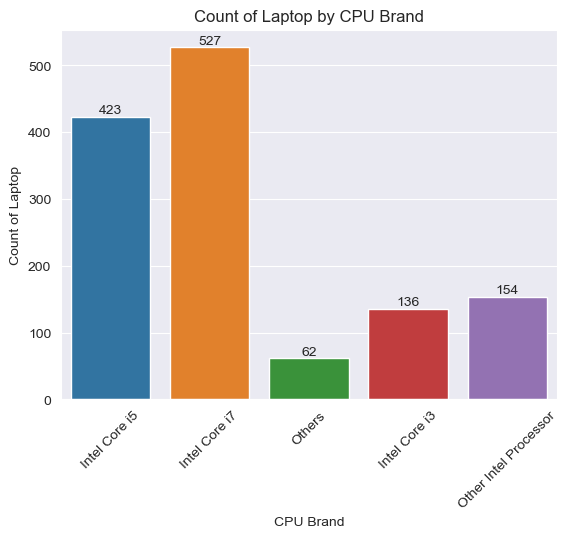

In [117]:
ax = sns.countplot(data=df, x='CpuBrand')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Count of Laptop by CPU Brand")
plt.xlabel("CPU Brand")
plt.ylabel("Count of Laptop")
plt.xticks(rotation=45)
plt.show()

2. Average Price by Cpu Brand

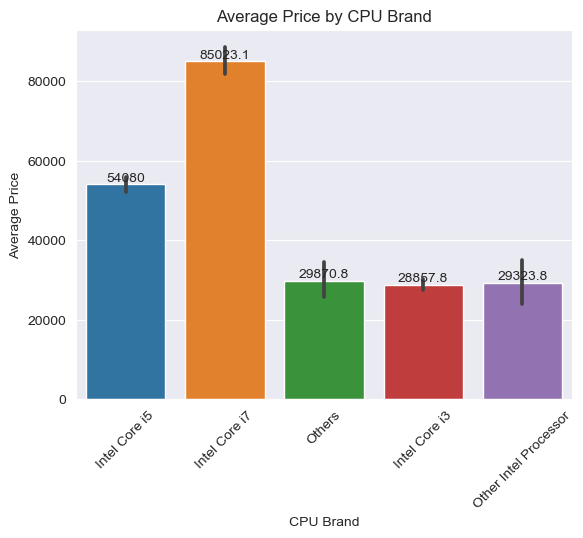

In [118]:
ax = sns.barplot(data=df, x='CpuBrand', y='Price')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Average Price by CPU Brand")
plt.xlabel("CPU Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

### 3. Count of Laptop By OS

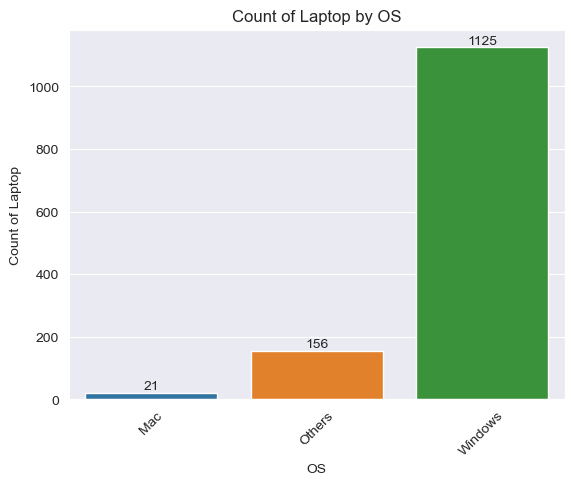

In [119]:
ax = sns.countplot(data=df, x='OS')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Count of Laptop by OS")
plt.xlabel("OS")
plt.ylabel("Count of Laptop")
plt.xticks(rotation=45)
plt.show()

## 4. Average Price by OS

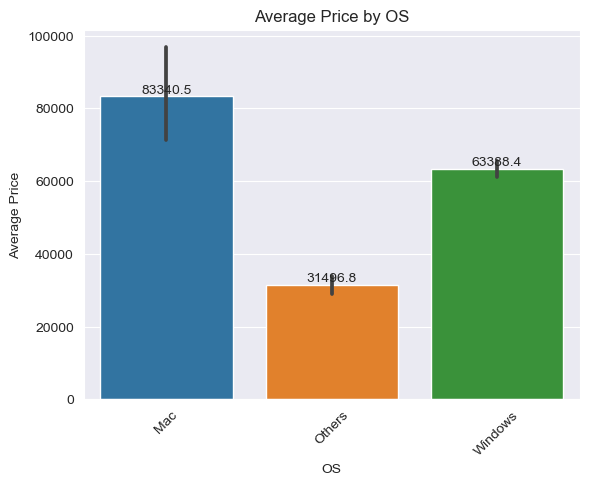

In [120]:
ax = sns.barplot(data=df, x='OS', y='Price')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Average Price by OS")
plt.xlabel("OS")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

In [121]:
## CORRELATION ON PRICE

df.corr(numeric_only=True)['Price']

Inches           0.067329
Ram              0.742905
Weight           0.209867
Price            1.000000
TouchScreen      0.192917
IPS              0.253320
PPI              0.475368
HDD             -0.096891
SSD              0.670660
Hybrid           0.007942
Flash_Storage   -0.040067
Name: Price, dtype: float64

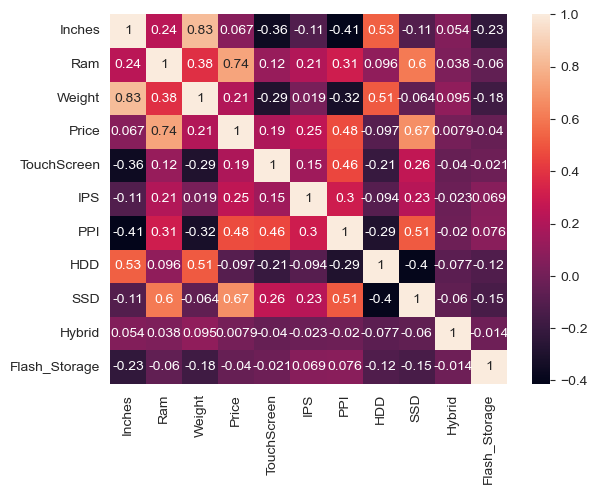

In [122]:
sns.heatmap(data=df.corr(numeric_only=True), annot = True)
plt.show()

In [123]:
df.drop(columns = ['Memory', 'Hybrid', 'Flash_Storage', 'Inches', 'Cpu', 'Gpu', 'OpSys', 'CpuName'], inplace = True)

C:\Users\oba_7\AppData\Local\Temp\ipykernel_2672\520846742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['Memory', 'Hybrid', 'Flash_Storage', 'Inches', 'Cpu', 'Gpu', 'OpSys', 'CpuName'], inplace = True)


In [124]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'IPS',
       'PPI', 'CpuBrand', 'HDD', 'SSD', 'GpuBrand', 'OS'],
      dtype='object')

## REMOVING OUTLIERS

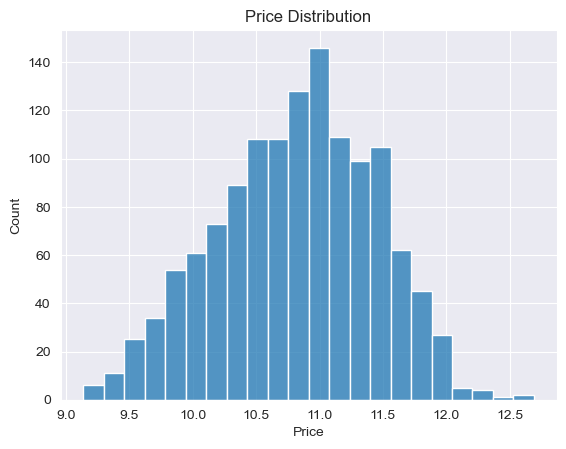

In [125]:
# NORMALIZING METHOD

sns.histplot(np.log(df['Price']))
plt.title("Price Distribution")
plt.show()

## BUILDING MACHINE LEARNING MODEL

In [126]:
#Import all ML algoritham 

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR



In [127]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,PPI,CpuBrand,HDD,SSD,GpuBrand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


## SPLITING DATA

In [128]:
# Divide the data for x(independent variable) and y(dependent variable). np.log(for normalizing data)

X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [129]:
X

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,CpuBrand,HDD,SSD,GpuBrand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [130]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

# TRAIN TEST SPLIT

In [131]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2) # example multi variable in python

In [132]:
X.shape

(1302, 12)

In [133]:
X_train.shape

(1106, 12)

In [134]:
X_test.shape

(196, 12)

## LINEAR REGRESSION

In [135]:
X.head()

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,CpuBrand,HDD,SSD,GpuBrand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [136]:
 #label encoding text to number
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')   

 # create a linear model

step2 = LinearRegression()   

# creating a channel/pipe (transformed data and model merged together)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit train data (to pass data into pipeline)

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [137]:
y_train

183     10.651384
1141    11.016798
1049     9.638174
1020    10.655148
878     10.791749
          ...    
466     10.126164
299     11.267217
493     10.336864
527     10.104611
1193    11.034319
Name: Price, Length: 1106, dtype: float64

In [138]:
y_test

248     10.490274
555      9.387207
1251     9.964522
547     10.111883
885     11.470547
          ...    
1129    11.004649
172      9.708902
322     10.973157
996     11.182680
470     11.575963
Name: Price, Length: 196, dtype: float64

In [139]:
y_pred

array([10.71551779,  9.68789625, 10.05772907, 10.36419053, 10.9307595 ,
       11.40488061, 10.25889466, 10.40921942, 11.14466133,  9.59209103,
       10.92671419, 11.03190932, 11.73878875, 10.88881283, 11.97739858,
       10.83564077, 10.79765094,  9.60226862, 11.38703165, 11.48699492,
       11.67127275, 11.10853048, 10.8194224 , 11.28523377, 10.50541425,
       11.77258077, 11.0490839 , 10.12775078, 10.89187441, 10.62290635,
       11.09091362, 10.02280722, 10.58792874, 11.05651019, 11.11013639,
       10.78744657, 10.9343528 , 10.95656674, 11.21352804, 11.43013699,
       11.68888183, 11.26709652,  9.75266347,  9.99983319, 10.19950985,
       10.01045244, 11.00679861, 11.92440251, 11.52604537, 10.84082859,
       11.52149204, 11.48346199,  9.75080263,  9.5265341 , 10.73856014,
       10.78351452, 10.06794994, 11.06454689, 10.20836982, 10.47400303,
       10.99935621, 11.1016776 ,  9.88068118, 10.47525204, 10.78405467,
       10.55220821, 10.03216691, 11.46029318, 10.7459282 ,  9.92

In [140]:
accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))



R2 Score : 80.73%
MAE : 21.02%
MSE : 7.37%
Cross Val Accuracy: 81.79 %


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

## KNN (K NEAREST NEIGHBOR)

In [141]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)


accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score : 81.22%
MAE : 18.92%
MSE : 7.19%
Cross Val Accuracy: 76.49 %


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## DECISION TREE REGRESSOR

In [142]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)


accuracies = cross_val_score(estimator = pipe, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

R2 Score : 79.98%
MAE : 20.12%
MSE : 7.66%
Cross Val Accuracy: 76.99 %


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## EXPORTING MODEL

In [144]:
import pickle

pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [146]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)